# Chapter 2.2 - Chapter 2.5

In this notebook, we cover the content from Chapter 2.2 to Chapter 2.5. We explore a workflow for acquiring financial data and performing basic statistical analyses on stock returns. First, we will use the **yfinance** library to fetch historical data for Apple (AAPL), then visualize the distribution of returns using both **histograms** and **Q–Q plots**. We will also conduct a **Jarque–Bera test** to see if the returns are normally distributed. Finally, we will generate **ACF** (autocorrelation function) and **PACF** (partial autocorrelation function) plots to investigate any serial correlations in the return series. By the end of this notebook, you should have a clear example of how to gather data, conduct normality tests, and carry out basic time-series diagnostics using standard Python tools.

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import scipy.stats as stats
from statsmodels.stats.stattools import jarque_bera
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.stattools import jarque_bera
from statsmodels.tsa.stattools import adfuller 
import pandas as pd


In [18]:
def read_data(ticker, start_date, end_date, interval):
  df = yf.download(tickers=ticker, start=start_date, end=end_date, interval=interval)
  df['ret'] = df['Close'].pct_change()
  df['log_ret'] = np.log(df['Close']) - np.log(df['Close'].shift(1))
  df = df.dropna()
  return df

df = read_data('AAPL', "2000-01-01", "2024-12-31", interval='1d')

[*********************100%***********************]  1 of 1 completed


## Histgram and QQ-plot

In [29]:
dta = df['ret'].values
print('Stock index')
print("Kurtosis: ", stats.kurtosis(dta))
print('Skew:', stats.skew(dta))
print('Mean:', np.mean(dta))
print('Median:', np.median(dta))

Stock index
Kurtosis:  36.6244714343915
Skew: -1.4690631585725027
Mean: 0.0012172630813673845
Median: 0.0009475667033957968


Text(0.5, 1.0, '')

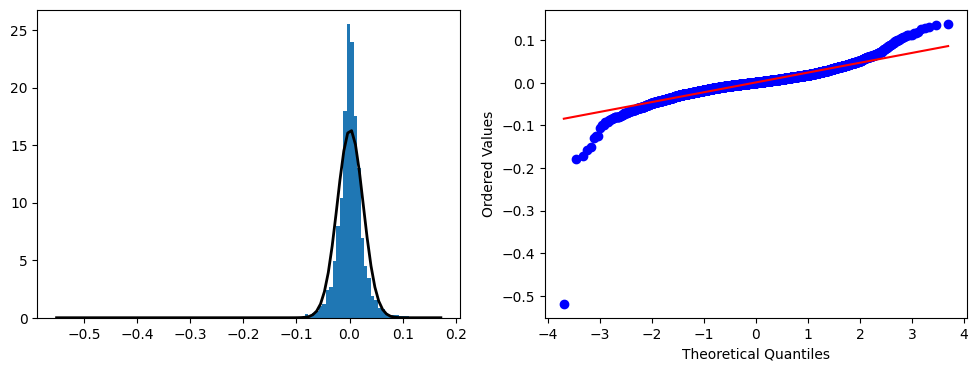

In [19]:
# histgram
plt.figure(figsize=(12,4))
plt.subplot(121)
s = plt.hist(df['ret'], bins=100, density=True)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, np.mean(df['ret']), np.std(df['ret']))
plt.plot(x, p, 'k', linewidth=2)

plt.subplot(122)
a = stats.probplot(np.array(df['ret']), dist="norm", plot=plt)
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.title('')


## Normality Test

In [21]:
test_stats, pvalue, _, _ = jarque_bera(df['ret'])
print('test statistics:', test_stats, 'pvalue:', pvalue)

test statistics: 353639.6881013425 pvalue: 0.0


## ACF and PACF

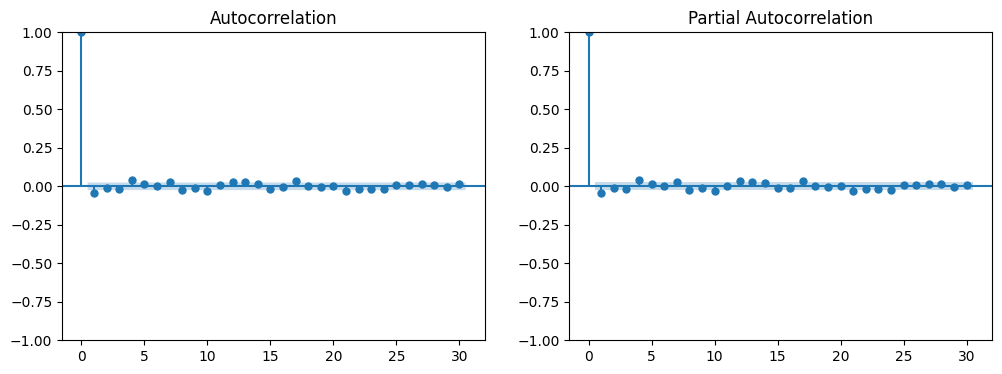

In [30]:
fig, ax = plt.subplots(1,2, figsize=(12,4))
plot_acf(df['ret'], lags=30, ax=ax[0])   # ACF
plot_pacf(df['ret'], lags=30, ax=ax[1]) # PACF
plt.show()

# Test for Stationarity

We here use the Augmented Dickey-Fuller test to test for a unit root in the return data. The null hypothesis states that a unit root is present in a time-series sample, whereas the alternative hypothesis suggests stationarity. The result rejects the null hypothesis which indicates stationarity of the series. However, this test typically indicates the stationarity of the mean of a series, suggesting that the mean of the series does not mean over time. For return series, it is usually true but financial returns do not have contstant varince which can be seen from the plot below. 

In [33]:
adf_result = adfuller(df['ret'], autolag='AIC')
print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])

ADF Statistic: -17.993353
p-value: 0.000000


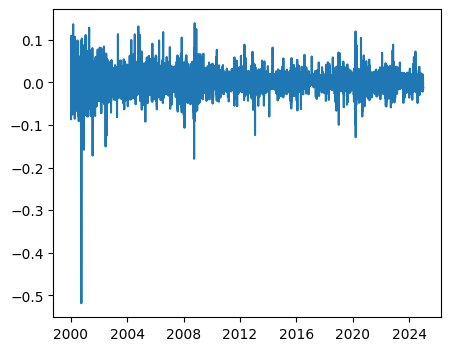

In [34]:
plt.figure()
plt.plot(df['ret'])